In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
train_df = pd.read_csv(r"C:\Users\neepu\train.csv")


In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Varaible Identification

### Dependent Variable-
Survived

### Independent Variables-
Independent Variable-
Passenger ID,
Pclass,
Name,
Age,
Parch,
Ticket,
Fare,
Cabin,
Embarked.


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Catagorical
Sex,Emabarked


# Continuous
age,fare,ticket

# Discreet
Survived,Pclass,Sibsp,Parch,Cabin

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harper, Miss. Annie Jessie ""Nina""",male,347082,G6,S
freq,1,577,7,4,644


1.Names are unique across the dataset (count=unique=891)
2.Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
3.Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
4.Embarked takes three possible values. S port used by most passengers (top=S)
5.Ticket feature has high ratio (22%) of duplicate values (unique=681).

# ------------------------------------------------------------------------------------------

# Univariate Analysis 

1.Age and Sex

Text(0.5, 1.0, 'Male')

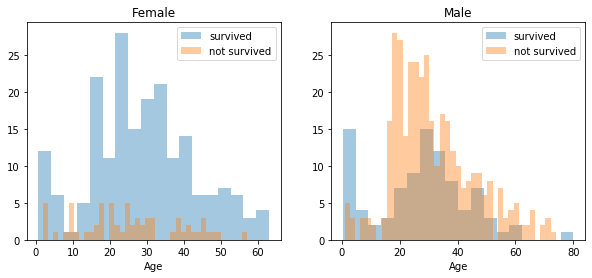

In [9]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(),bins = 18,label =survived,ax = axes[0],kde = False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(),bins = 40,label = not_survived,ax = axes[0],kde = False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(),bins =18,label = survived,ax = axes[1],kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(),bins =40,label = not_survived,ax= axes[1],kde = False)
ax.legend()
ax.set_title('Male')
                       

men have a high probability of survival when they are between 18 and 30 years old

women have the probability in between 14 and 40.


### Embarked,Pclass and Sex

C:\TURBOC3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


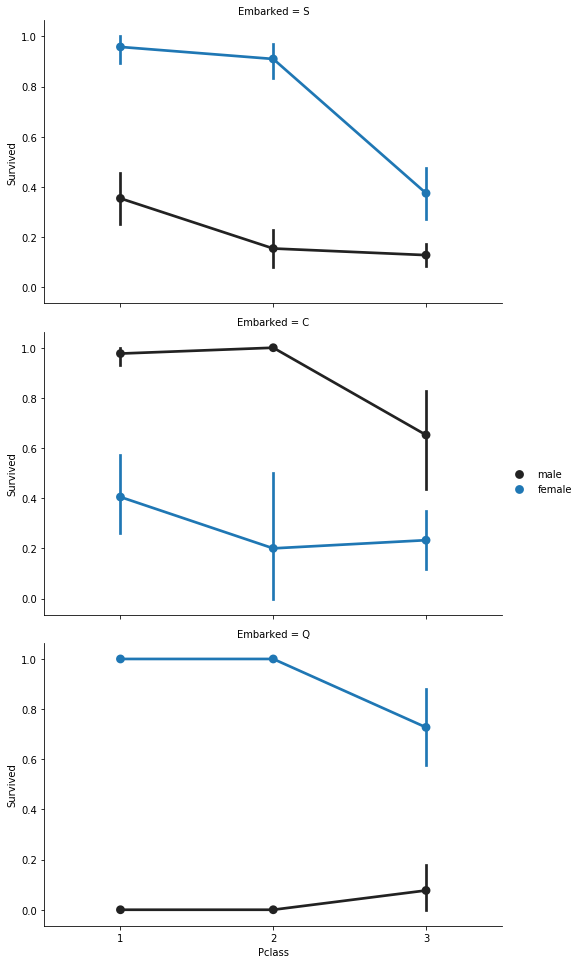

In [10]:
FacetGrid = sns.FacetGrid(train_df,row ='Embarked',size = 4.5,aspect = 1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex',palatte = None, order=None,hue_order = None)
FacetGrid.add_legend()

Women have high rate of survival when they are at port Q and S while men have high rate of survival when they are at port C

4.Pclass

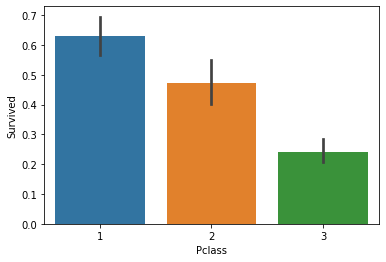

In [11]:
sns.barplot(x = 'Pclass',y = 'Survived',data = train_df)

1st class person has high chance of survival

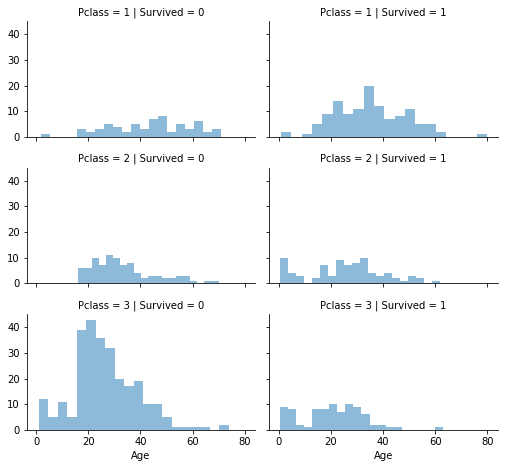

In [12]:
grid = sns.FacetGrid(train_df,col= 'Survived',row = 'Pclass',size = 2.2,aspect = 1.6)
grid.map(plt.hist,'Age',alpha = 0.5,bins = 20)
grid.add_legend()

The plot above shows that pclass 3 persons have high probability that they will not survive

5.SibSp and Parch:

In [13]:
data = [train_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['relatives']>0,'not_alone'] =0
    dataset.loc[dataset['relatives']==0,'not_alone']=1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\TURBOC3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


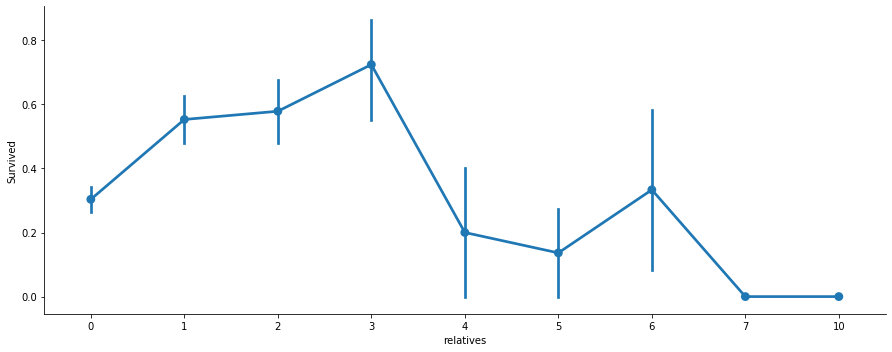

In [14]:
axes = sns.factorplot('relatives','Survived',data = train_df,aspect = 2.5)

# Bivariate Analysis 

In [15]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean().sort_values(by ='Survived',ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train_df[["SibSp","Survived"]].groupby(['SibSp'],as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train_df[["Parch","Survived"]].groupby(['Parch'],as_index= False).mean().sort_values(by = 'Survived',ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


C:\TURBOC3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


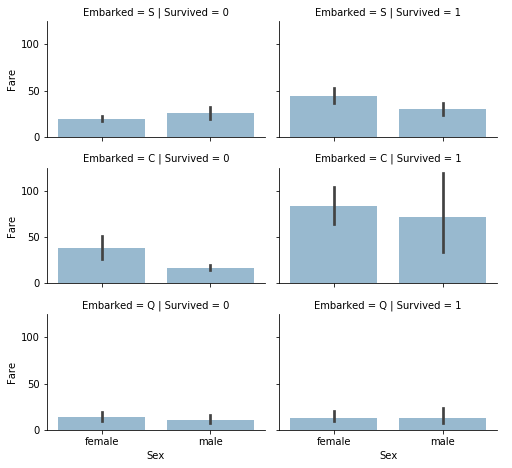

In [18]:
grid = sns.FacetGrid(train_df,row='Embarked',col = 'Survived',size = 2.2,aspect  = 1.6)
grid.map(sns.barplot,'Sex','Fare',alpha = .5)
grid.add_legend()

# Missing Value Treatment 

Cabin and Ticket has hig duplicate values ...So we can drop them.

In [19]:
train_df = train_df.drop(['Ticket','Cabin'],axis = 1)

In [20]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,0,1


We can extract the title of particular persons so that we can group them according to their frequencies

In [21]:
data = [train_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)


In [22]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,1,0.156673
1,2,0.702703
2,3,0.793651
3,4,0.575000
4,5,0.347826


Age 

In [23]:
data = [train_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = train_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

Since Embarked feature has two missing values ,we will fill it with most common one

In [24]:
train_df['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [25]:
common_value = 'S'
data = [train_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

# Dummy Variable Creation 

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
relatives      891 non-null int64
not_alone      891 non-null int32
Title          891 non-null int64
dtypes: float64(1), int32(2), int64(7), object(2)
memory usage: 76.7+ KB


In the above we see that 'Fare' is float and there are 4 catagorical variables-Name,Sex,Ticket and Embarked.

Fare

In [27]:
data = [train_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

Name

We already extracted Titles from names in input no 107

Sex

In [28]:
genders = {"male":0, "female":1}
data = [train_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

Ticket

Ticket attribute has 681 unique tickets,it will be difficult to convert them into useful catagories.SO we can drop it from dataset which we did in input no 94

In [29]:
ports = {"S": 0,"C": 1,"Q": 2}
data = [train_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)


# Creating New Catagories

1.Age

In [30]:
data = [train_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

2.Fare

In [31]:
data = [train_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

Fare per person

In [32]:

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [33]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Fare_Per_Person
0,1,0,3,0,2,1,0,0,0,1,0,1,0
1,2,1,1,1,5,1,0,3,1,1,0,3,1
2,3,1,3,1,3,0,0,0,0,0,1,2,0
3,4,1,1,1,5,1,0,3,0,1,0,3,1
4,5,0,3,0,5,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,3,0,0,1,0,0,1,5,1
887,888,1,1,1,2,0,0,2,0,0,1,2,2
888,889,0,3,1,5,1,2,2,0,3,0,2,0
889,890,1,1,0,3,0,0,2,1,0,1,1,2


# REGRESSION MODEL

In [295]:
cols = train_df.columns
cols=['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','relatives','not_alone','Title','Fare_Per_Person','Survived']

In [296]:
train_df = train_df[cols]
train_df

KeyError: "['PassengerId'] not in index"

In [297]:
train_df.drop('PassengerId',axis = 1,inplace = True)

KeyError: "['PassengerId'] not found in axis"

In [294]:
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Fare_Per_Person,Survived
0,3,0,2,1,0,0,0,1,0,1,0,0
1,1,1,5,1,0,3,1,1,0,3,1,1
2,3,1,3,0,0,0,0,0,1,2,0,1
3,1,1,5,1,0,3,0,1,0,3,1,1
4,3,0,5,0,0,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,3,0,0,1,0,0,1,5,1,0
887,1,1,2,0,0,2,0,0,1,2,2,1
888,3,1,5,1,2,2,0,3,0,2,0,0
889,1,0,3,0,0,2,1,0,1,1,2,1


In [218]:
x = train_df.iloc[:,:-1].values
y = train_df.iloc[:,-1].values

In [219]:
x

array([[3, 0, 2, ..., 0, 1, 0],
       [1, 1, 5, ..., 0, 3, 1],
       [3, 1, 3, ..., 1, 2, 0],
       ...,
       [3, 1, 5, ..., 0, 2, 0],
       [1, 0, 3, ..., 1, 1, 2],
       [3, 0, 4, ..., 1, 1, 0]], dtype=int64)

In [220]:
x.shape

(891, 11)

In [221]:
y.shape

(891,)

Splitting the data in Training and Test Set

In [298]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.50,random_state = 0) 


In [299]:
x_train

array([[2, 0, 4, ..., 1, 1, 1],
       [2, 0, 6, ..., 1, 1, 2],
       [3, 0, 3, ..., 1, 1, 0],
       ...,
       [3, 0, 6, ..., 1, 1, 0],
       [3, 1, 5, ..., 0, 3, 1],
       [2, 0, 6, ..., 0, 1, 1]], dtype=int64)

In [300]:
x_train.shape

(445, 11)

In [301]:
x_test.shape

(446, 11)

In [302]:
y_train.shape

(445,)

In [303]:
y_test.shape

(446,)

Performing Linear Regression

In [304]:
from sklearn.linear_model import LinearRegression

In [305]:
lm = LinearRegression()

In [306]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [307]:
print(lm.intercept_)

0.416947913464648


In [308]:
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Fare_Per_Person,Survived
0,3,0,2,1,0,0,0,1,0,1,0,0
1,1,1,5,1,0,3,1,1,0,3,1,1
2,3,1,3,0,0,0,0,0,1,2,0,1
3,1,1,5,1,0,3,0,1,0,3,1,1
4,3,0,5,0,0,1,0,0,1,1,1,0


In [309]:
print(lm.coef_)

[-0.10738613  0.40024466 -0.02017721 -0.03059909 -0.01962787  0.07034127
  0.06435069 -0.05022696 -0.04777405  0.10167734 -0.05605771]


In [310]:
coeff_df = pd.DataFrame(lm.coef_,pd.DataFrame(x_test, columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','relatives','not_alone','Title','Fare_Per_Person']).columns,columns=['Cofficient'])

In [311]:
coeff_df

,Cofficient
Pclass,-0.107386
Sex,0.400245
Age,-0.020177
SibSp,-0.030599
Parch,-0.019628
Fare,0.070341
Embarked,0.064351
relatives,-0.050227
not_alone,-0.047774
Title,0.101677


In [312]:
y_pred = lm.predict(x_test)

In [313]:
y_pred

array([ 0.1062638 ,  0.12851559,  0.37772376,  1.10708113,  0.78468093,
        0.37185498,  0.82163526,  0.91805   ,  0.48919824,  0.73593399,
        0.05510918,  0.67139845,  0.17650814,  0.80674787,  0.91205681,
        0.63043759,  0.10244474,  0.26778379,  0.06209032,  0.566336  ,
        0.25018529,  0.88216688,  0.17650814,  0.35167777,  0.62454394,
        1.0529296 ,  0.06798397,  0.61026038,  0.8616907 ,  0.45688358,
        0.14661822,  0.65122124,  0.08226753,  0.3054297 ,  0.03493197,
        0.78238339,  0.02762955,  0.18965366,  0.20983087,  0.55600859,
        0.35881178,  0.15251187,  0.08226753, -0.00584557,  0.98809247,
        0.12851559,  0.06798397,  0.95162149,  0.16947645,  0.29446109,
        0.37185498,  0.50016946,  0.79577665,  0.10833839,  0.43620567,
        0.23663536,  0.27096894,  0.37605753,  0.2599936 ,  0.26384426,
        0.17268908,  0.58062058,  0.93058861,  0.85719858,  0.67016617,
        0.19668535,  1.07792294,  0.71496478,  0.79577665,  0.85

In [314]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [315]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)

In [316]:
from math import sqrt
rmse = sqrt(mse)

In [317]:
print('Mean_Squared_Error:',mse)
print('Root_Mean_Squared_Error :',rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error: 0.14618299605303814
Root_Mean_Squared_Error : 0.38233884978254323
r_square_value : 0.3696343548985208


If the value of R2 is 0.3927 then this suggests that 39.27% of the variation in Y can be explained with the help of given explanatory variables in that model. In other words, it explains the proportion of variation in the dependent variable that is explained by the independent variables.



# Adjusted R square

In [318]:
AdjustedR= (1 - ((1-r_squared)*890)/(891-11-1))
AdjustedR

0.3617458200906525

In [319]:
x_test[0]

array([3, 0, 6, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [320]:
lm.predict([[30, 40, 70,  0. ,  1. ,  0.,8,6,6,6,4 ]])

array([12.08575053])

# Logistic Regression 

In [321]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)


C:\TURBOC3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [322]:
y_pred = lr.predict(x_test)

In [323]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [324]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

### Model Evaluation using Confusion Matrix 

In [325]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
print(confusion)

[[234  49]
 [ 41 122]]


In [326]:
TN = confusion [0,0]
FP = confusion [0,1]
FN = confusion [1,0]
TP = confusion [1,1]

Here, you can see that  confusion matrix in the form of the array object.The dimension of the matrix is 2^2  because this model is binary classification.You have two classes 0 and 1. Diagonal values represent accurate predictions,while non diagonal elements are innacurate predictions.

138 and 78 are accurate predictions, 22 and 30 are innacurate.

In [327]:
print(confusion)
print("TN:",TN)
print("FP:",FP)
print("FN:",FN)
print("TP:",TP)

[[234  49]
 [ 41 122]]
TN: 234
FP: 49
FN: 41
TP: 122


In [331]:
confusion_matrix = pd.DataFrame(confusion)
confusion_matrix.columns = ['Predicted not  Survived','Predicted Survived']
confusion_matrix = confusion_matrix.rename(index ={0 : 'Actual not Survived',1: 'Actual Survived '})
confusion_matrix

,Predicted not Survived,Predicted Survived
Actual not Survived,234,49
Actual Survived,41,122


### Classificaton Accuracy

In [332]:
from sklearn import metrics
acc_log = metrics.accuracy_score(y_test,y_pred)
acc_log1 = (TN+TP)/(TN+TP+FN+FP)
print("Accuracy from metrics:",acc_log)
print("Accuracy Calculated:", acc_log1)

Accuracy from metrics: 0.7982062780269058
Accuracy Calculated: 0.7982062780269058


###  Classificaton Error:

In [333]:
print((FP+FN)/float(TP+TN+FP+FN))
print(round(1-metrics.accuracy_score(y_test,y_pred),4))

0.20179372197309417
0.2018


###  Sensitivity :When the actual value is Positive, how often is the prediction correct

### True Positive Rate or Recall 

In [334]:
print("RECALL:",metrics.recall_score(y_test,y_pred))
print("Calculated Recall:", (TP)/(TP+FN))

RECALL: 0.7484662576687117
Calculated Recall: 0.7484662576687117


### Specificity: When the actual value is Negative,how often is the prediction correct?

### True Negative Rete

In [335]:
print("Specificity/True Neagetive Rate:",(TN)/(TN+FP))

Specificity/True Neagetive Rate: 0.8268551236749117


### False Positive Rate:

In [336]:
print("False Positive Rate:", (FN)/(FN+TP))

False Positive Rate: 0.25153374233128833


###  False Negative Rate:When the actual value is negative ,how often is the prediction incorrect

In [337]:
print("False Negative Rate:",(FP)/(TN+FP))

False Negative Rate: 0.17314487632508835


###  Precision:When  a positive value is predicted how often is the prediction correct?

In [338]:
print("Precision:", round(metrics.precision_score(y_test,y_pred),2))
print("Precision Calculated:",round(TP/float(TP+FP),2))

Precision: 0.71
Precision Calculated: 0.71


### f1score = 2pr/(p+r)

In [339]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

acc_log = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print('Accuracy is  :' ,round(acc_log,2)*100)
print('F1 score is :' ,round(f1,2)*100)
print('Precision is  :',round(precision,2)*100)
print('Recall is  :',round(recall,4)*100)
print('Roc Auc is  :',round(roc_auc,2)*100)

Accuracy is  : 80.0
F1 score is : 73.0
Precision is  : 71.0
Recall is  : 74.85000000000001
Roc Auc is  : 79.0


In [340]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       283
           1       0.71      0.75      0.73       163

    accuracy                           0.80       446
   macro avg       0.78      0.79      0.78       446
weighted avg       0.80      0.80      0.80       446



### KNN Classification

In [341]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [342]:
y_pred = knn.predict(x_test)

In [343]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix(y_test,y_pred)

array([[233,  50],
       [ 47, 116]], dtype=int64)

In [344]:
acc_knn= accuracy_score(y_test,y_pred)

In [345]:
error = []
accuracy = []

for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(accuracy_score(y_test,pred_i))

Text(0, 0.5, 'Mean Error')

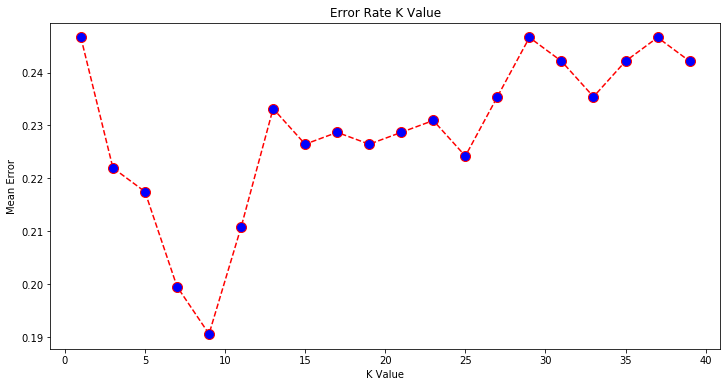

In [346]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40,2), error,color = 'red',linestyle = 'dashed',marker= 'o',markerfacecolor = 'blue',markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Accuracy')

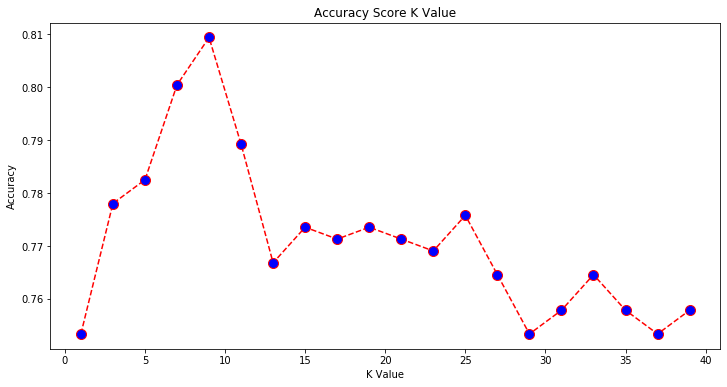

In [347]:
plt.figure(figsize = (12,6))
plt.plot(range(1,40,2),accuracy,color = 'red',linestyle = 'dashed',marker = 'o',markerfacecolor = 'blue',markersize = 10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [348]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [349]:
y_pred1 = knn.predict(x_test)

In [350]:
confusion_matrix(y_test,y_pred1)

array([[246,  37],
       [ 48, 115]], dtype=int64)

In [351]:
acc_knn = accuracy_score(y_test, y_pred1)

In [352]:
acc_knn

0.8094170403587444

# Decision Tree Model

In [353]:
from sklearn.tree import DecisionTreeClassifier


In [354]:
clf = DecisionTreeClassifier()

In [355]:
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [356]:
from sklearn import metrics


In [357]:
print("acc_decision_tree:",round(metrics.accuracy_score(y_test,y_pred)*100,2),"%")

acc_decision_tree: 77.8 %


In [358]:
acc_decision_tree = metrics.accuracy_score(y_test,y_pred)

In [359]:
acc_decision_tree

0.7780269058295964

In [360]:
from sklearn.metrics import confusion_matrix

In [361]:
cm = confusion_matrix(y_test,y_pred)

In [362]:
cm

array([[244,  39],
       [ 60, 103]], dtype=int64)

# Random Forest Model 

In [363]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [364]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [365]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [366]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[244,  39],
       [ 41, 122]], dtype=int64)

In [367]:
acc_random_forest = metrics.accuracy_score(y_test,y_pred)

In [368]:
acc_random_forest

0.820627802690583

# Accuracy Score of all models 

In [369]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Logistic Regression','KNN','Decisin Tree', 
              'Random Forest'],
    'Score': [r_squared , acc_log, acc_knn, 
              acc_decision_tree, acc_random_forest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.820628,Random Forest
0.809417,KNN
0.798206,Logistic Regression
0.778027,Decisin Tree
0.369634,Linear Regression


# As we can see Random Forest goes in 1st place.The model has an average accuracy level of 82.06%.So we can now conclude that the model of Random Forest which is the most important branch of Classification model could successfully predict the survival rate of passengers in the titanic ship at 82.06% which is more accurate than other models as we have seen in the above.
